<a href="https://colab.research.google.com/github/vvtrip/ml_manifestations/blob/master/09_EDA_impl/ipl_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

In [2]:
!wget https://hr-projects-assets-prod.s3.amazonaws.com/lrpqaeb14h/e186636d099c5d032901dfaf5db68852/matches.csv
!wget https://hr-projects-assets-prod.s3.amazonaws.com/lrpqaeb14h/6f3085efd6250aa3c886059677871a29/deliveries.csv

--2023-08-07 16:18:20--  https://hr-projects-assets-prod.s3.amazonaws.com/lrpqaeb14h/e186636d099c5d032901dfaf5db68852/matches.csv
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 52.217.43.180, 3.5.25.82, 52.216.57.209, ...
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|52.217.43.180|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139754 (136K) [binary/octet-stream]
Saving to: ‘matches.csv.1’

matches.csv.1       100%[===================>] 136.48K  --.-KB/s    in 0.005s  

2023-08-07 16:18:20 (28.0 MB/s) - ‘matches.csv.1’ saved [139754/139754]

--2023-08-07 16:18:20--  https://hr-projects-assets-prod.s3.amazonaws.com/lrpqaeb14h/6f3085efd6250aa3c886059677871a29/deliveries.csv
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 52.217.43.180, 3.5.25.82, 52.216.57.209, ...
Connecting to hr-projects-assets-prod.s3.amazonaw

In [3]:
mat = pd.read_csv('./matches.csv')
deli = pd.read_csv('./deliveries.csv')
mat.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace=True)
mat.replace('M. Chinnaswamy Stadium','M Chinnaswamy Stadium', inplace=True)
mat.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium', inplace=True)
mat.replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association Stadium', inplace=True)
mat.replace('IS Bindra Stadium','Punjab Cricket Association Stadium', inplace=True)
mat.replace('MA Chidambaram Stadium, Chepauk','M. A. Chidambaram Stadium', inplace=True)
mat.replace('Feroz Shah Kotla Ground','Feroz Shah Kotla', inplace=True)
mat.replace('Rajiv Gandhi International Stadium, Uppal','Rajiv Gandhi Intl. Cricket Stadium', inplace=True)
mat.replace('Subrata Roy Sahara Stadium','Maharashtra Cricket Association Stadium', inplace=True)
mat.replace('ACA-VDCA Stadium','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', inplace=True)

In [4]:
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi Intl. Cricket Stadium,Anil Dandekar,Nigel Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Draw a bar plot on the total number of matches across every season

Text(0.5, 1.0, 'Total Number of Matches hosted seasons wise')

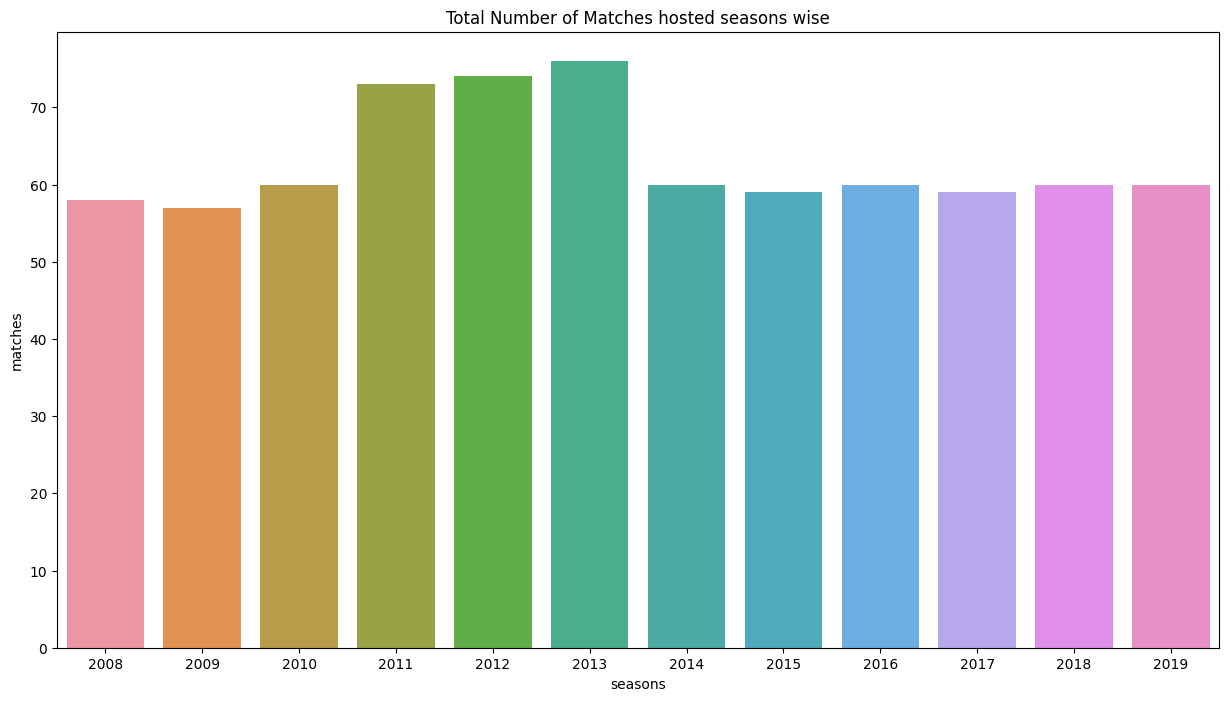

In [6]:
fig1,ax1=plt.subplots(figsize=(15,8))

sns.barplot(x=mat.season.value_counts().index, y=mat.season.value_counts())
ax1.set_xlabel('seasons')
ax1.set_ylabel('matches')
ax1.set_title('Total Number of Matches hosted seasons wise')

# Draw a count plot on the total number of games hosted in each stadium

Text(0.5, 1.0, 'No. of games hosted in each stadium')

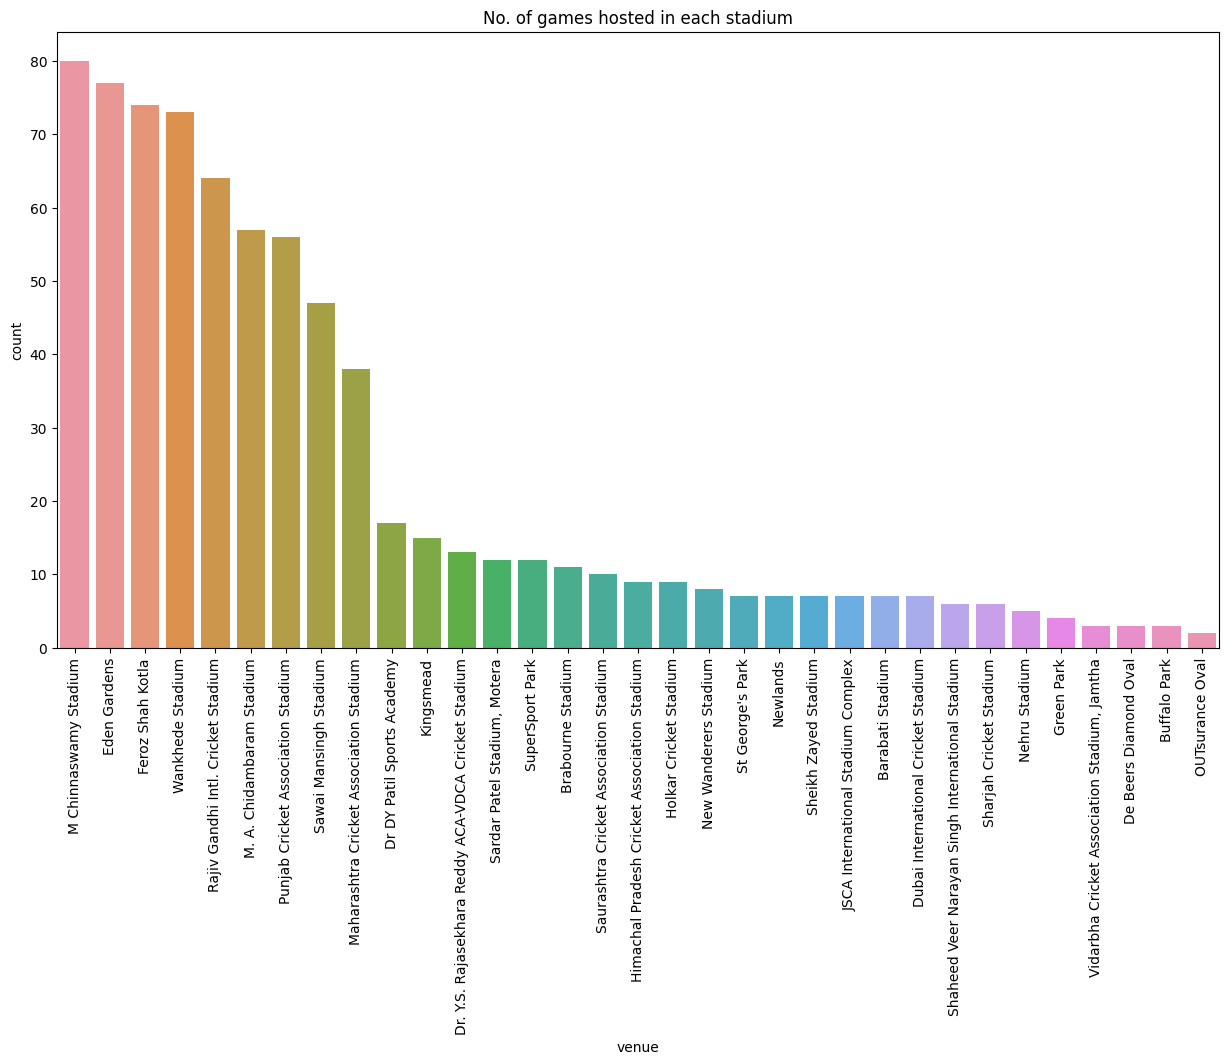

In [7]:
fig2,ax2=plt.subplots(figsize=(15,8))


sns.countplot(x=mat.venue, order=mat['venue'].value_counts().index)
ax2.set_xlabel('venue')
plt.xticks(rotation=90)
ax2.set_ylabel('count')
ax2.set_title('No. of games hosted in each stadium')

# Draw a bar plot on matches won by team batting first.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Chennai Super Kings'),
  Text(1, 0, 'Mumbai Indians'),
  Text(2, 0, 'Rajasthan Royals'),
  Text(3, 0, 'Kolkata Knight Riders'),
  Text(4, 0, 'Delhi Capitals'),
  Text(5, 0, 'Deccan Chargers'),
  Text(6, 0, 'Royal Challengers Bangalore'),
  Text(7, 0, 'Sunrisers Hyderabad'),
  Text(8, 0, 'Kings XI Punjab'),
  Text(9, 0, 'Pune Warriors')])

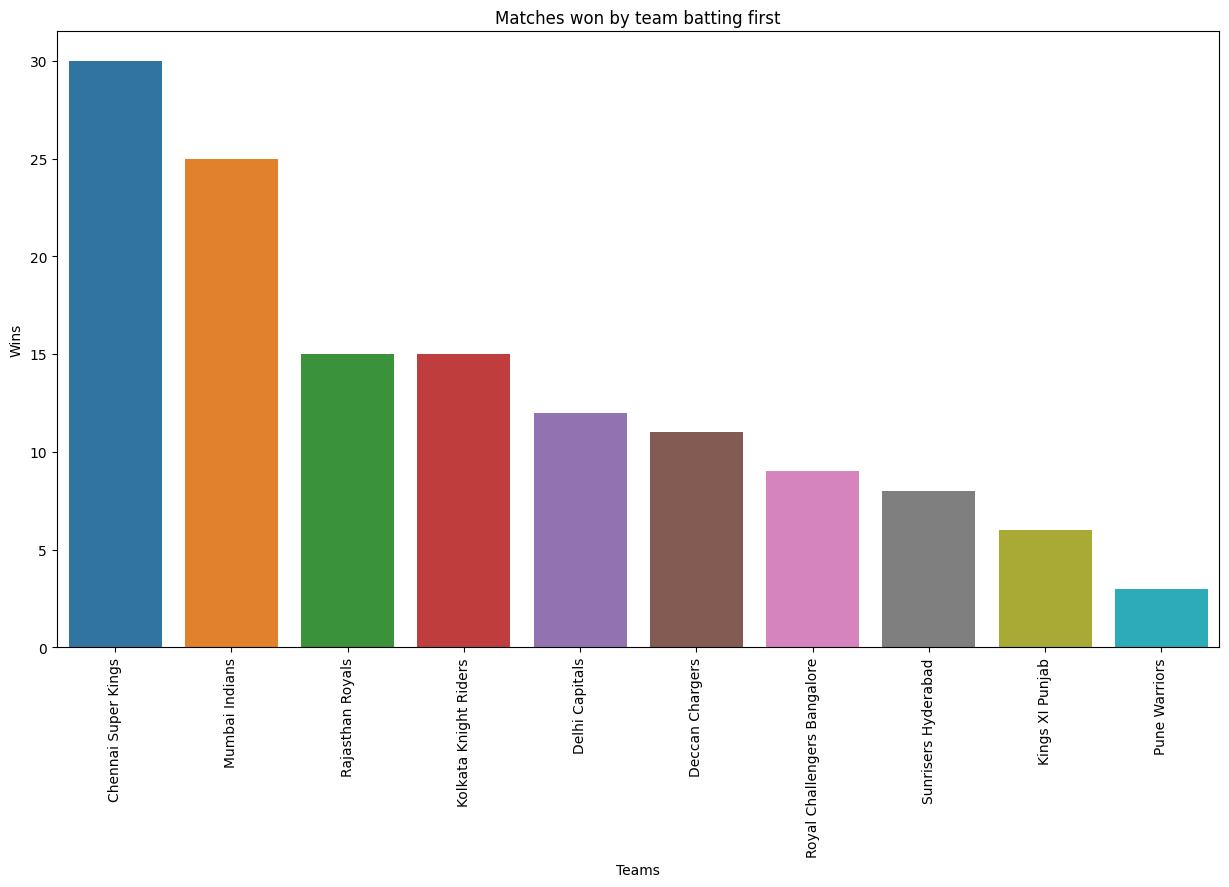

In [8]:
fig3,ax3=plt.subplots(figsize=(15,8))


frst = mat[(mat.toss_winner == mat.winner) & (mat.toss_decision=='bat')].reset_index(drop=True)
sns.barplot(x=frst.winner.value_counts().index, y=frst.winner.value_counts())
ax3.set_xlabel('Teams')
ax3.set_ylabel('Wins')
ax3.set_title('Matches won by team batting first')
plt.xticks(rotation=90)

# Draw a scatter plot on runs scored by batsmen on each match with respect to balls faced .

Text(0.5, 1.0, 'Runs Scored vs Balls Faced')

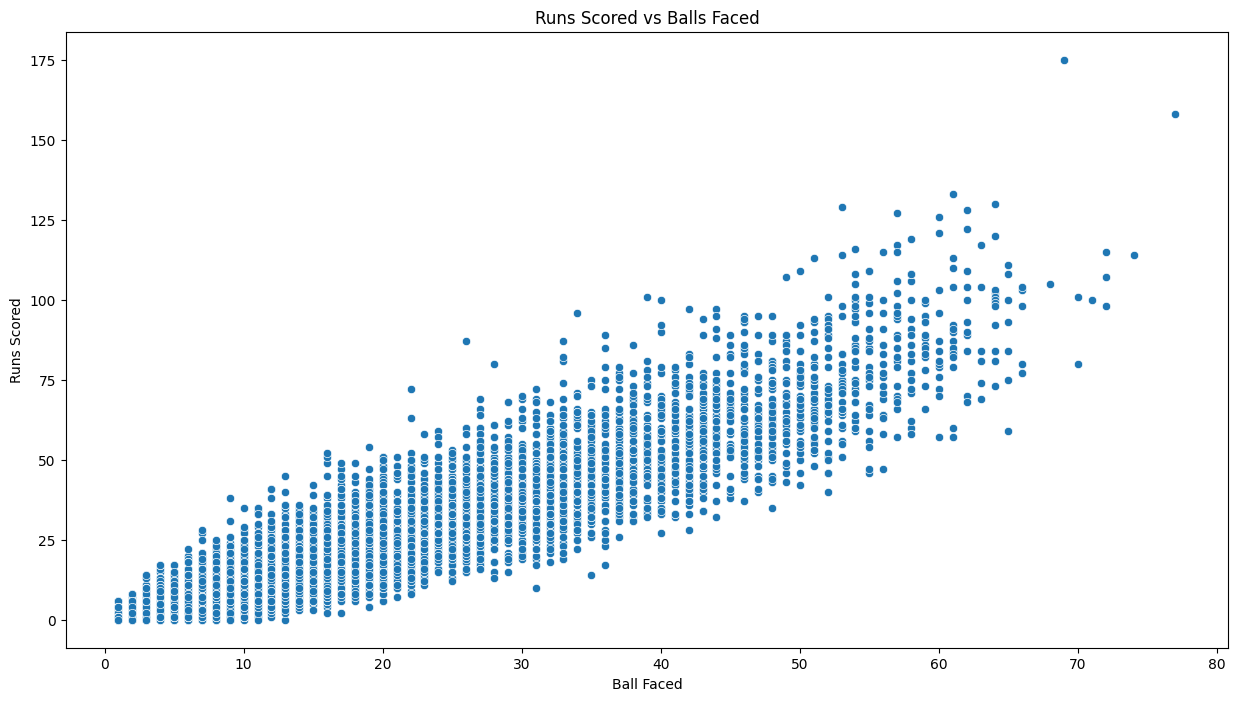

In [9]:
fig5,ax5=plt.subplots(figsize=(15,8))


runs = deli.groupby(['match_id','batsman']).batsman_runs.sum()
runs_list = runs.tolist()
blls = deli.copy()
balls = blls.groupby(['match_id','batsman']).batsman.count()
balls_list = balls.tolist()
dff = pd.DataFrame({'Ball Faced':balls_list, 'Runs Scored':runs_list})
sns.scatterplot(x= 'Ball Faced', y = 'Runs Scored', data= dff)
ax5.set_title('Runs Scored vs Balls Faced')


# Draw a scatter plot on strike rate progression of batsmen with respect to balls faced .

Text(0.5, 1.0, 'Strike Rate vs Balls Faced')

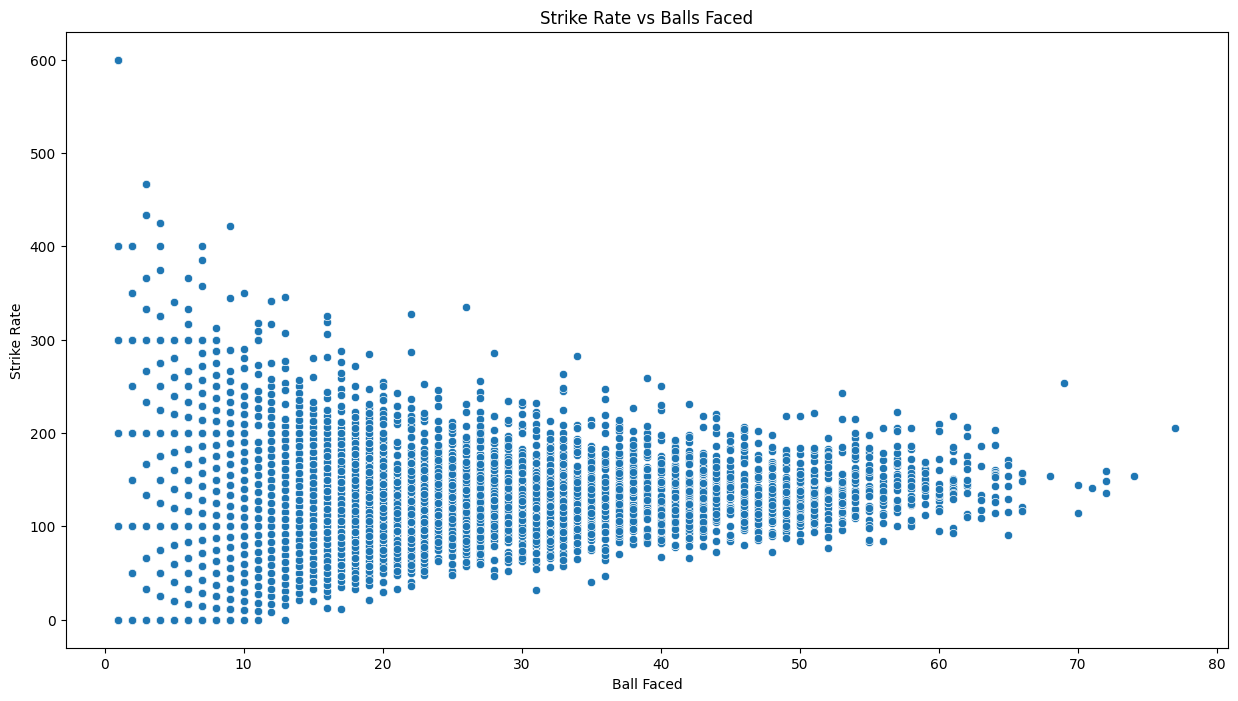

In [10]:
fig6,ax6=plt.subplots(figsize=(15,8))


runs = deli.groupby(['match_id','batsman']).batsman_runs.sum()
runs_list = runs.tolist()
blls = deli.copy()
balls = blls.groupby(['match_id','batsman']).batsman.count()
balls_list = balls.tolist()
sr=[]
for i in range(len(balls_list)):
    sr.append((runs_list[i]/balls_list[i])*100)

dff = pd.DataFrame({'Ball Faced':balls_list, 'Strike Rate':sr})
sns.scatterplot(x= 'Ball Faced', y = 'Strike Rate', data= dff)
ax6.set_title('Strike Rate vs Balls Faced')

# Draw a bar plot on strike rate of all batsmen having minimum runs of 2500 in overall Tournament .

Text(0, 0.5, 'Strike Rate')

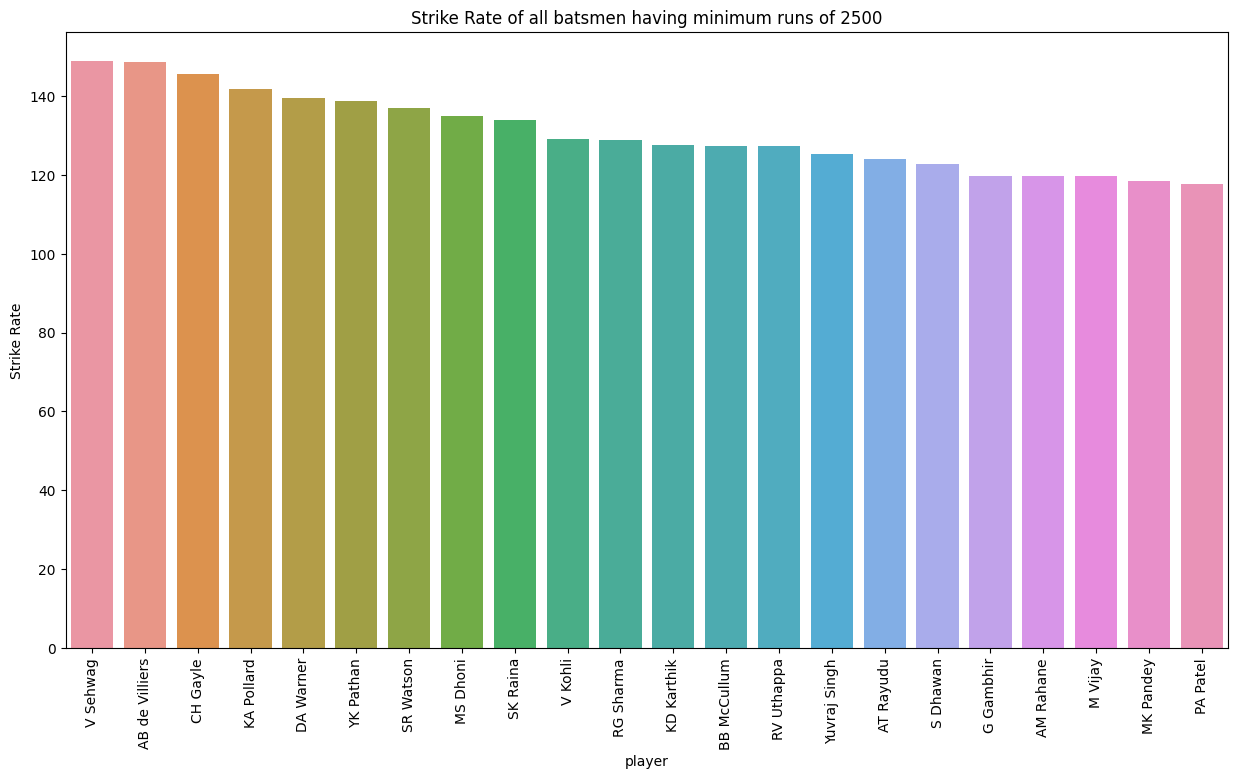

In [11]:
fig7,ax7=plt.subplots(figsize=(15,8))


names = deli.groupby(['batsman']).batsman_runs.sum().index
runs = deli.groupby(['batsman']).batsman_runs.sum().values
indices = [i for i in range(len(runs)) if runs[i] >= 2500]
player =[]
tot_runs=[]
balls_faced = []
sr=[]
for i in range(len(indices)):
    player.append(names[indices[i]])
    tot_runs.append(runs[indices[i]])
dl = deli[deli.batsman.isin(player)]
for i in range(len(dl.batsman.unique())):

    balls_faced.append(dl.groupby('batsman').batsman.count().values[i])
    sr.append((tot_runs[i]/balls_faced[i])*100)


dff = pd.DataFrame({'player':player, 'tot runs':tot_runs, 'balls_faced':balls_faced,'sr':sr})
dks = dff.copy()
dff= dff.sort_values(by='sr', ascending=False).reset_index(drop=True)
sns.barplot(x='player', y='sr', data=dff)
plt.xticks(rotation=90)
ax7.set_title('Strike Rate of all batsmen having minimum runs of 2500')
ax7.set_ylabel('Strike Rate')


# Draw a bar plot on average of all batsmen having minimum 2500 runs in overall tournament .

Text(0, 0.5, 'Average')

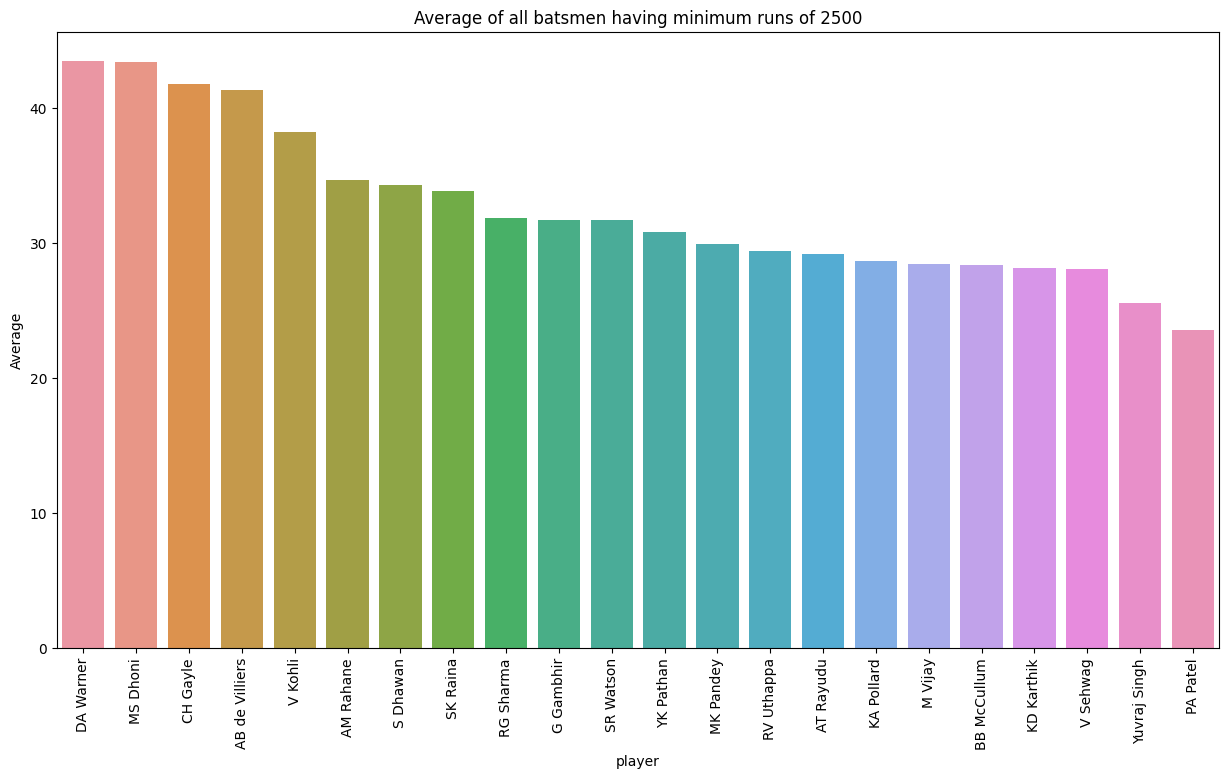

In [12]:
fig8,ax8=plt.subplots(figsize=(15,8))


dll = dl[dl.player_dismissed.isin(player)]
dll = dll.sort_values(by='batsman').reset_index(drop=True)
outs = dll.player_dismissed.value_counts().sort_index(ascending=True).values.tolist()

dks['outs'] = outs
avg=[]
for i in range(len(dks)):
    avg.append(dks['tot runs'][i]/dks['outs'][i])

dks['avg'] = avg

dks= dks.sort_values(by='avg', ascending=False).reset_index(drop=True)
sns.barplot(x='player', y='avg', data=dks)
plt.xticks(rotation=90)
ax8.set_title('Average of all batsmen having minimum runs of 2500')
ax8.set_ylabel('Average')

# Draw a bar plot on Strike rate of top 10 innings by a batsman when they score 100 in a particular match.

Text(0, 0.5, '')

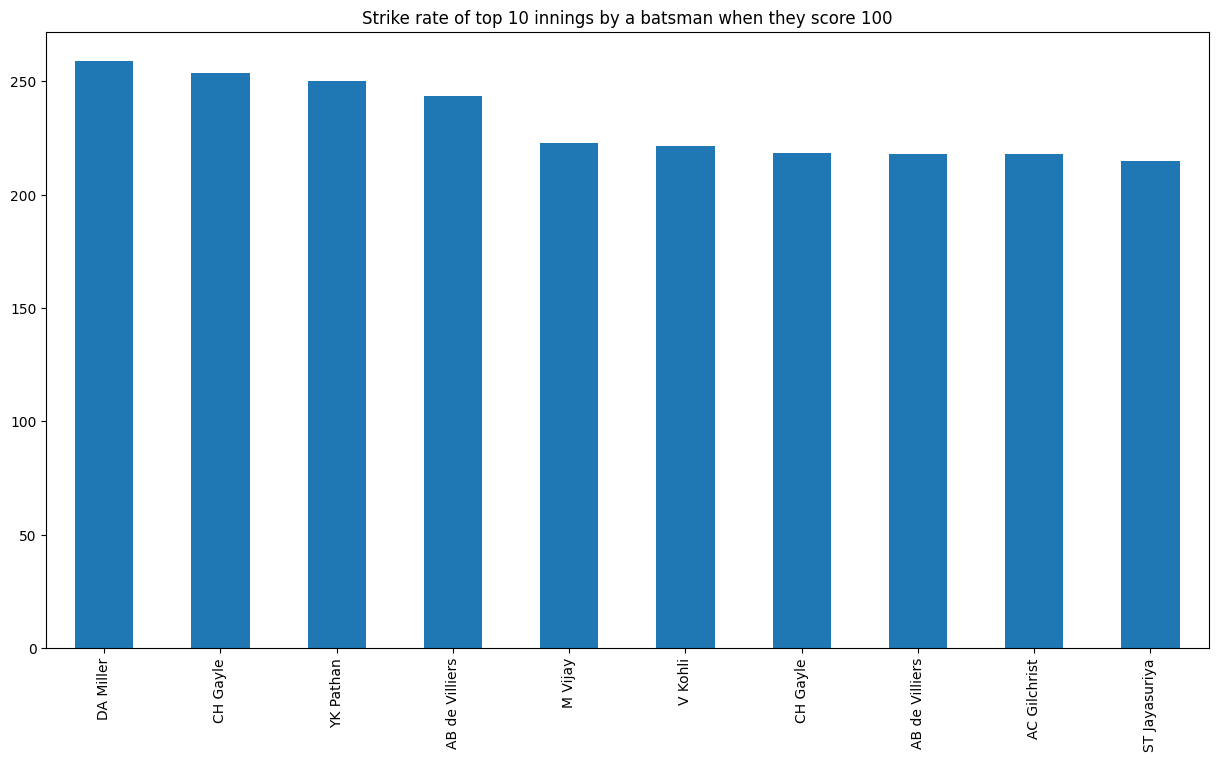

In [13]:
fig9,ax9=plt.subplots(figsize=(15,8))

a = deli.groupby(['match_id','batsman']).batsman_runs.sum().sort_values(ascending=False) [:62]
balls = []
pl=[]
rn=[]
srr=[]
for i in range(len(a)):
    pl.append(a.index[i][1])
    balls.append(len(deli[(deli.match_id==a.index[i][0]) & (deli.batsman== a.index[i][1])]))
    rn.append(a.values[i])
    srr.append((rn[-1]/balls[-1])*100)
tp = pd.DataFrame({'player':pl,'runs':rn,'balls':balls,'srr':srr})
tpp = tp.sort_values(by='srr', ascending=False).reset_index(drop=True)

tpp[:10].plot(x='player', y='srr', kind='bar',figsize=(15,8), legend=False, ax=ax9)

plt.title('Strike rate of top 10 innings by a batsman when they score 100')
plt.xlabel('')
plt.ylabel('')


# Draw a stacked bar plot on home city matches and wins for currently playing 8 teams.

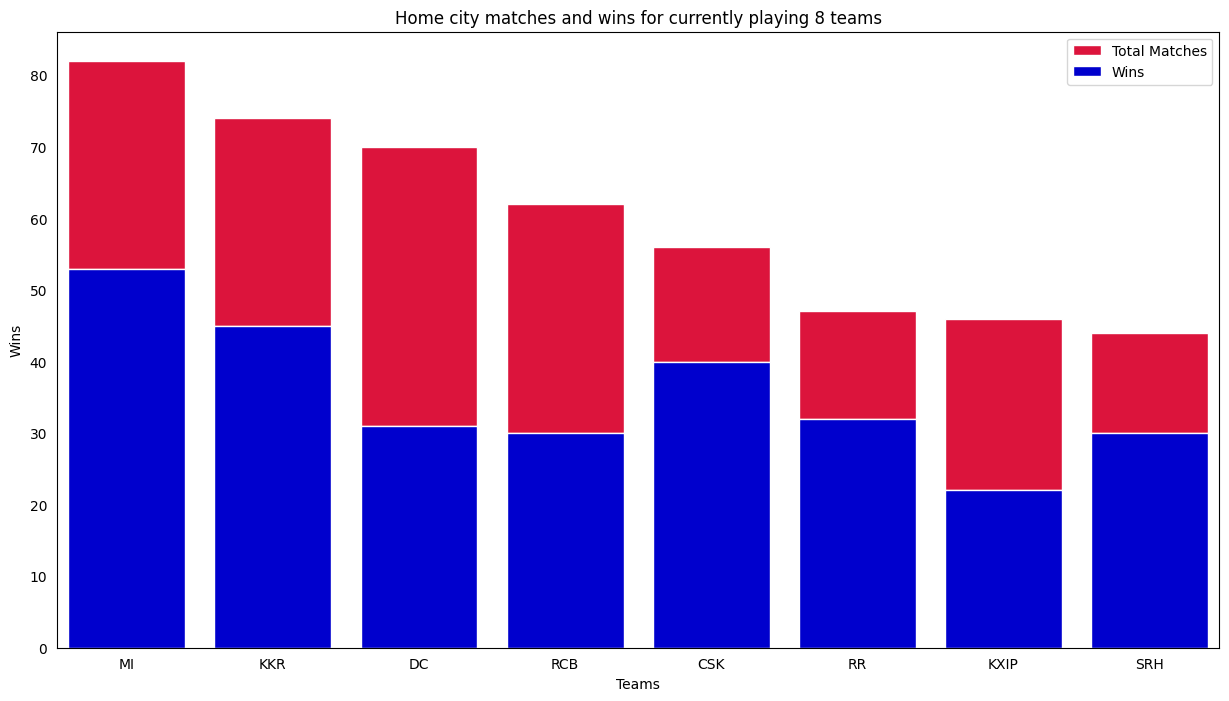

In [14]:
fig10,ax10=plt.subplots(figsize=(15,8))


mat.replace('Chennai Super Kings','CSK', inplace=True)
mat.replace('Kings XI Punjab','KXIP', inplace=True)
mat.replace('Sunrisers Hyderabad','SRH', inplace=True)
mat.replace('Royal Challengers Bangalore','RCB', inplace=True)
mat.replace('Kolkata Knight Riders','KKR', inplace=True)
mat.replace('Mumbai Indians','MI', inplace=True)
mat.replace('Rajasthan Royals','RR', inplace=True)
mat.replace('Delhi Capitals','DC', inplace=True)

lst= ['MI','KKR','DC','RCB','CSK','RR','KXIP','SRH']
cities= ['Mumbai','Chennai','Chandigarh','Jaipur','Hyderabad','Bangalore','Kolkata','Delhi']
mat[(mat.team1.isin(lst) | mat.team2.isin(lst)) & (mat.city.isin(cities))]
mat.head()


tmp = mat[mat.city.isin(cities)]
MI = tmp[(tmp.city=='Mumbai') & ((tmp.team1=='MI') | (tmp.team2=='MI'))]
CSK = tmp[(tmp.city=='Chennai') & ((tmp.team1=='CSK') | (tmp.team2=='CSK'))]
KXIP = tmp[(tmp.city=='Chandigarh') & ((tmp.team1=='KXIP') | (tmp.team2=='KXIP'))]
DC = tmp[(tmp.city=='Delhi') & ((tmp.team1=='DC') | (tmp.team2=='DC'))]
KKR = tmp[(tmp.city=='Kolkata') & ((tmp.team1=='KKR') | (tmp.team2=='KKR'))]
SRH = tmp[(tmp.city=='Hyderabad') & ((tmp.team1=='SRH') | (tmp.team2=='SRH'))]
RCB = tmp[(tmp.city=='Bangalore') & ((tmp.team1=='RCB') | (tmp.team2=='RCB'))]
RR = tmp[(tmp.city=='Jaipur') & ((tmp.team1=='RR') | (tmp.team2=='RR'))]



lst= ['MI','KKR','DC','RCB','CSK','RR','KXIP','SRH']
total = [29, 29, 39, 32, 16, 15, 24, 14]
win = [53, 45, 31, 30 , 40, 32, 22, 30]


plt.bar(lst,total, bottom=win, color='crimson', label='Total Matches',edgecolor='white')
plt.bar(lst,win, color='mediumblue', label='Wins',edgecolor='white')
plt.title('Home city matches and wins for currently playing 8 teams')
plt.xlabel('Teams')
plt.ylabel('Wins')
plt.legend()
plt.tick_params(left=False, bottom=False)
plt.margins(x=0.01)